✈️ ANALYSE EXPLORATOIRE - SATISFACTION PASSAGERS AÉRIENS

📁 SECTION 1: CHARGEMENT ET APERÇU GÉNÉRAL

✅ Dataset chargé avec succès!
📊 Dimensions: 103,904 lignes × 24 colonnes

--------------------------------------------------------------------------------
📋 APERÇU DES PREMIÈRES LIGNES
--------------------------------------------------------------------------------
       id  Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes             satisfaction
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus              460                      3                                  4                       3              1               5

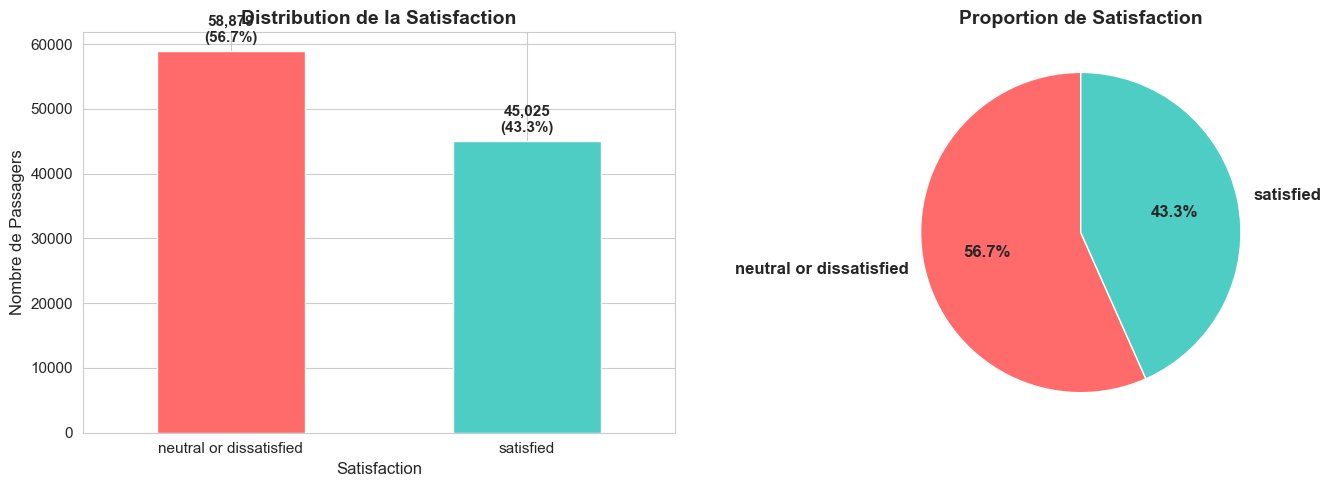


💾 Graphique sauvegardé: airline_target_distribution.png

🔍 SECTION 3: ANALYSE DES VALEURS MANQUANTES

⚠️ 1 colonnes avec valeurs manquantes:
--------------------------------------------------------------------------------
                 Colonne  Valeurs Manquantes  Pourcentage
Arrival Delay in Minutes                 310     0.298352


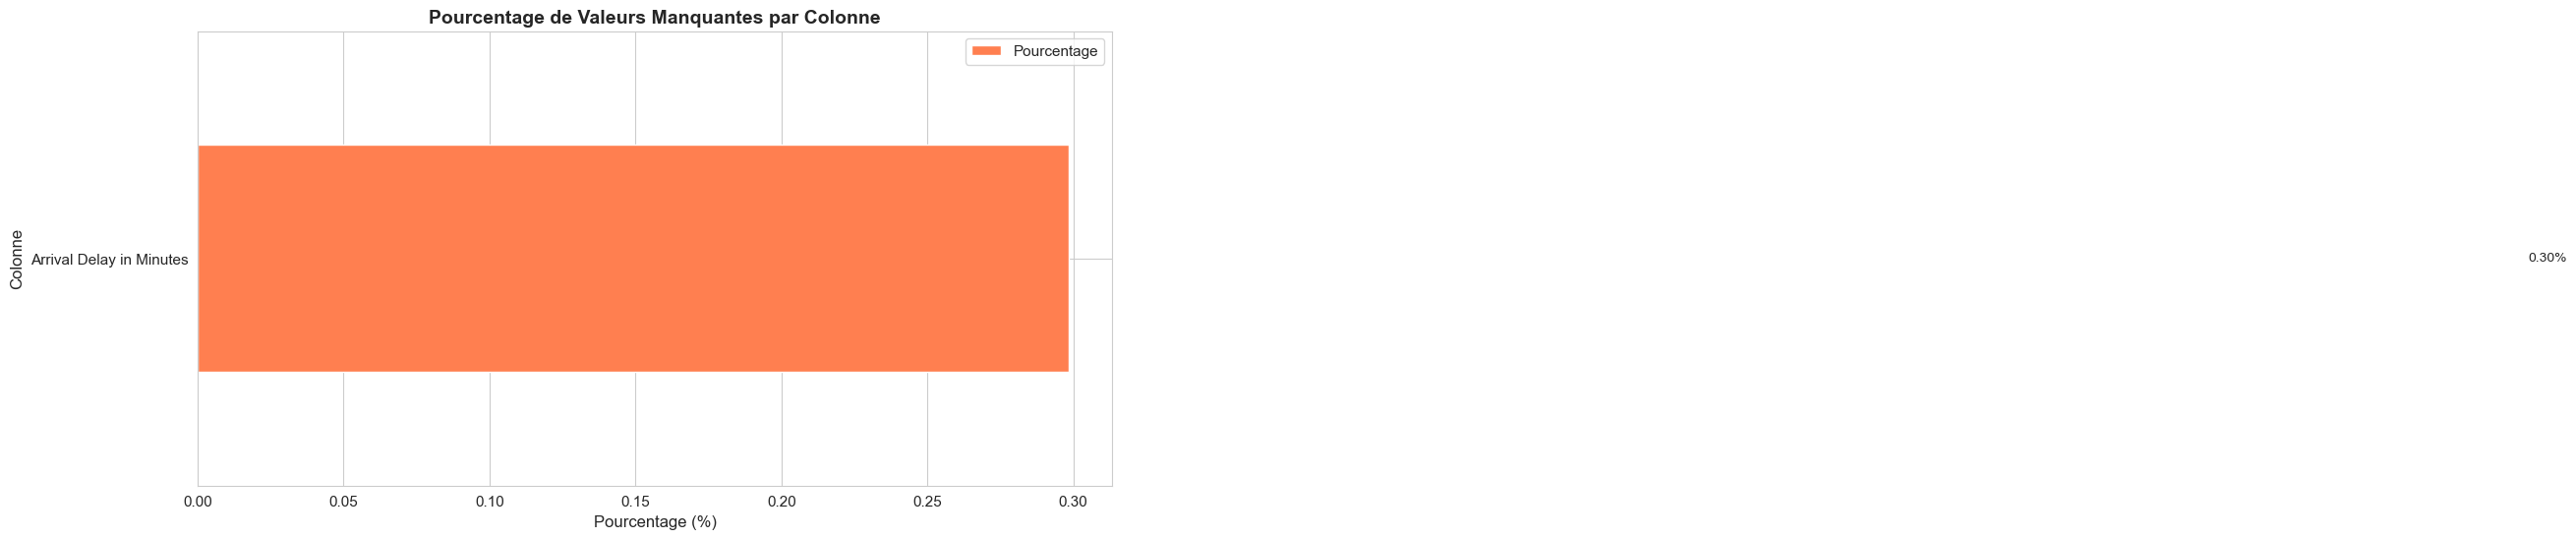


💾 Graphique sauvegardé: airline_missing_values.png

📊 Total de valeurs manquantes: 310 / 2,493,696 (0.01%)

📊 SECTION 4: STATISTIQUES DESCRIPTIVES

📈 Variables numériques: 19
📝 Variables catégorielles: 4

--------------------------------------------------------------------------------
📈 STATISTIQUES DES VARIABLES NUMÉRIQUES
--------------------------------------------------------------------------------
                                      count          mean           std   min       25%      50%       75%       max  missing  missing_pct  skewness    kurtosis
id                                 103904.0  64924.210502  37463.812252   1.0  32533.75  64856.5  97368.25  129880.0        0     0.000000  0.002864   -1.198440
Age                                103904.0     39.379706     15.114964   7.0     27.00     40.0     51.00      85.0        0     0.000000 -0.004516   -0.719568
Flight Distance                    103904.0   1189.448375    997.147281  31.0    414.00    843.0   1743.00   

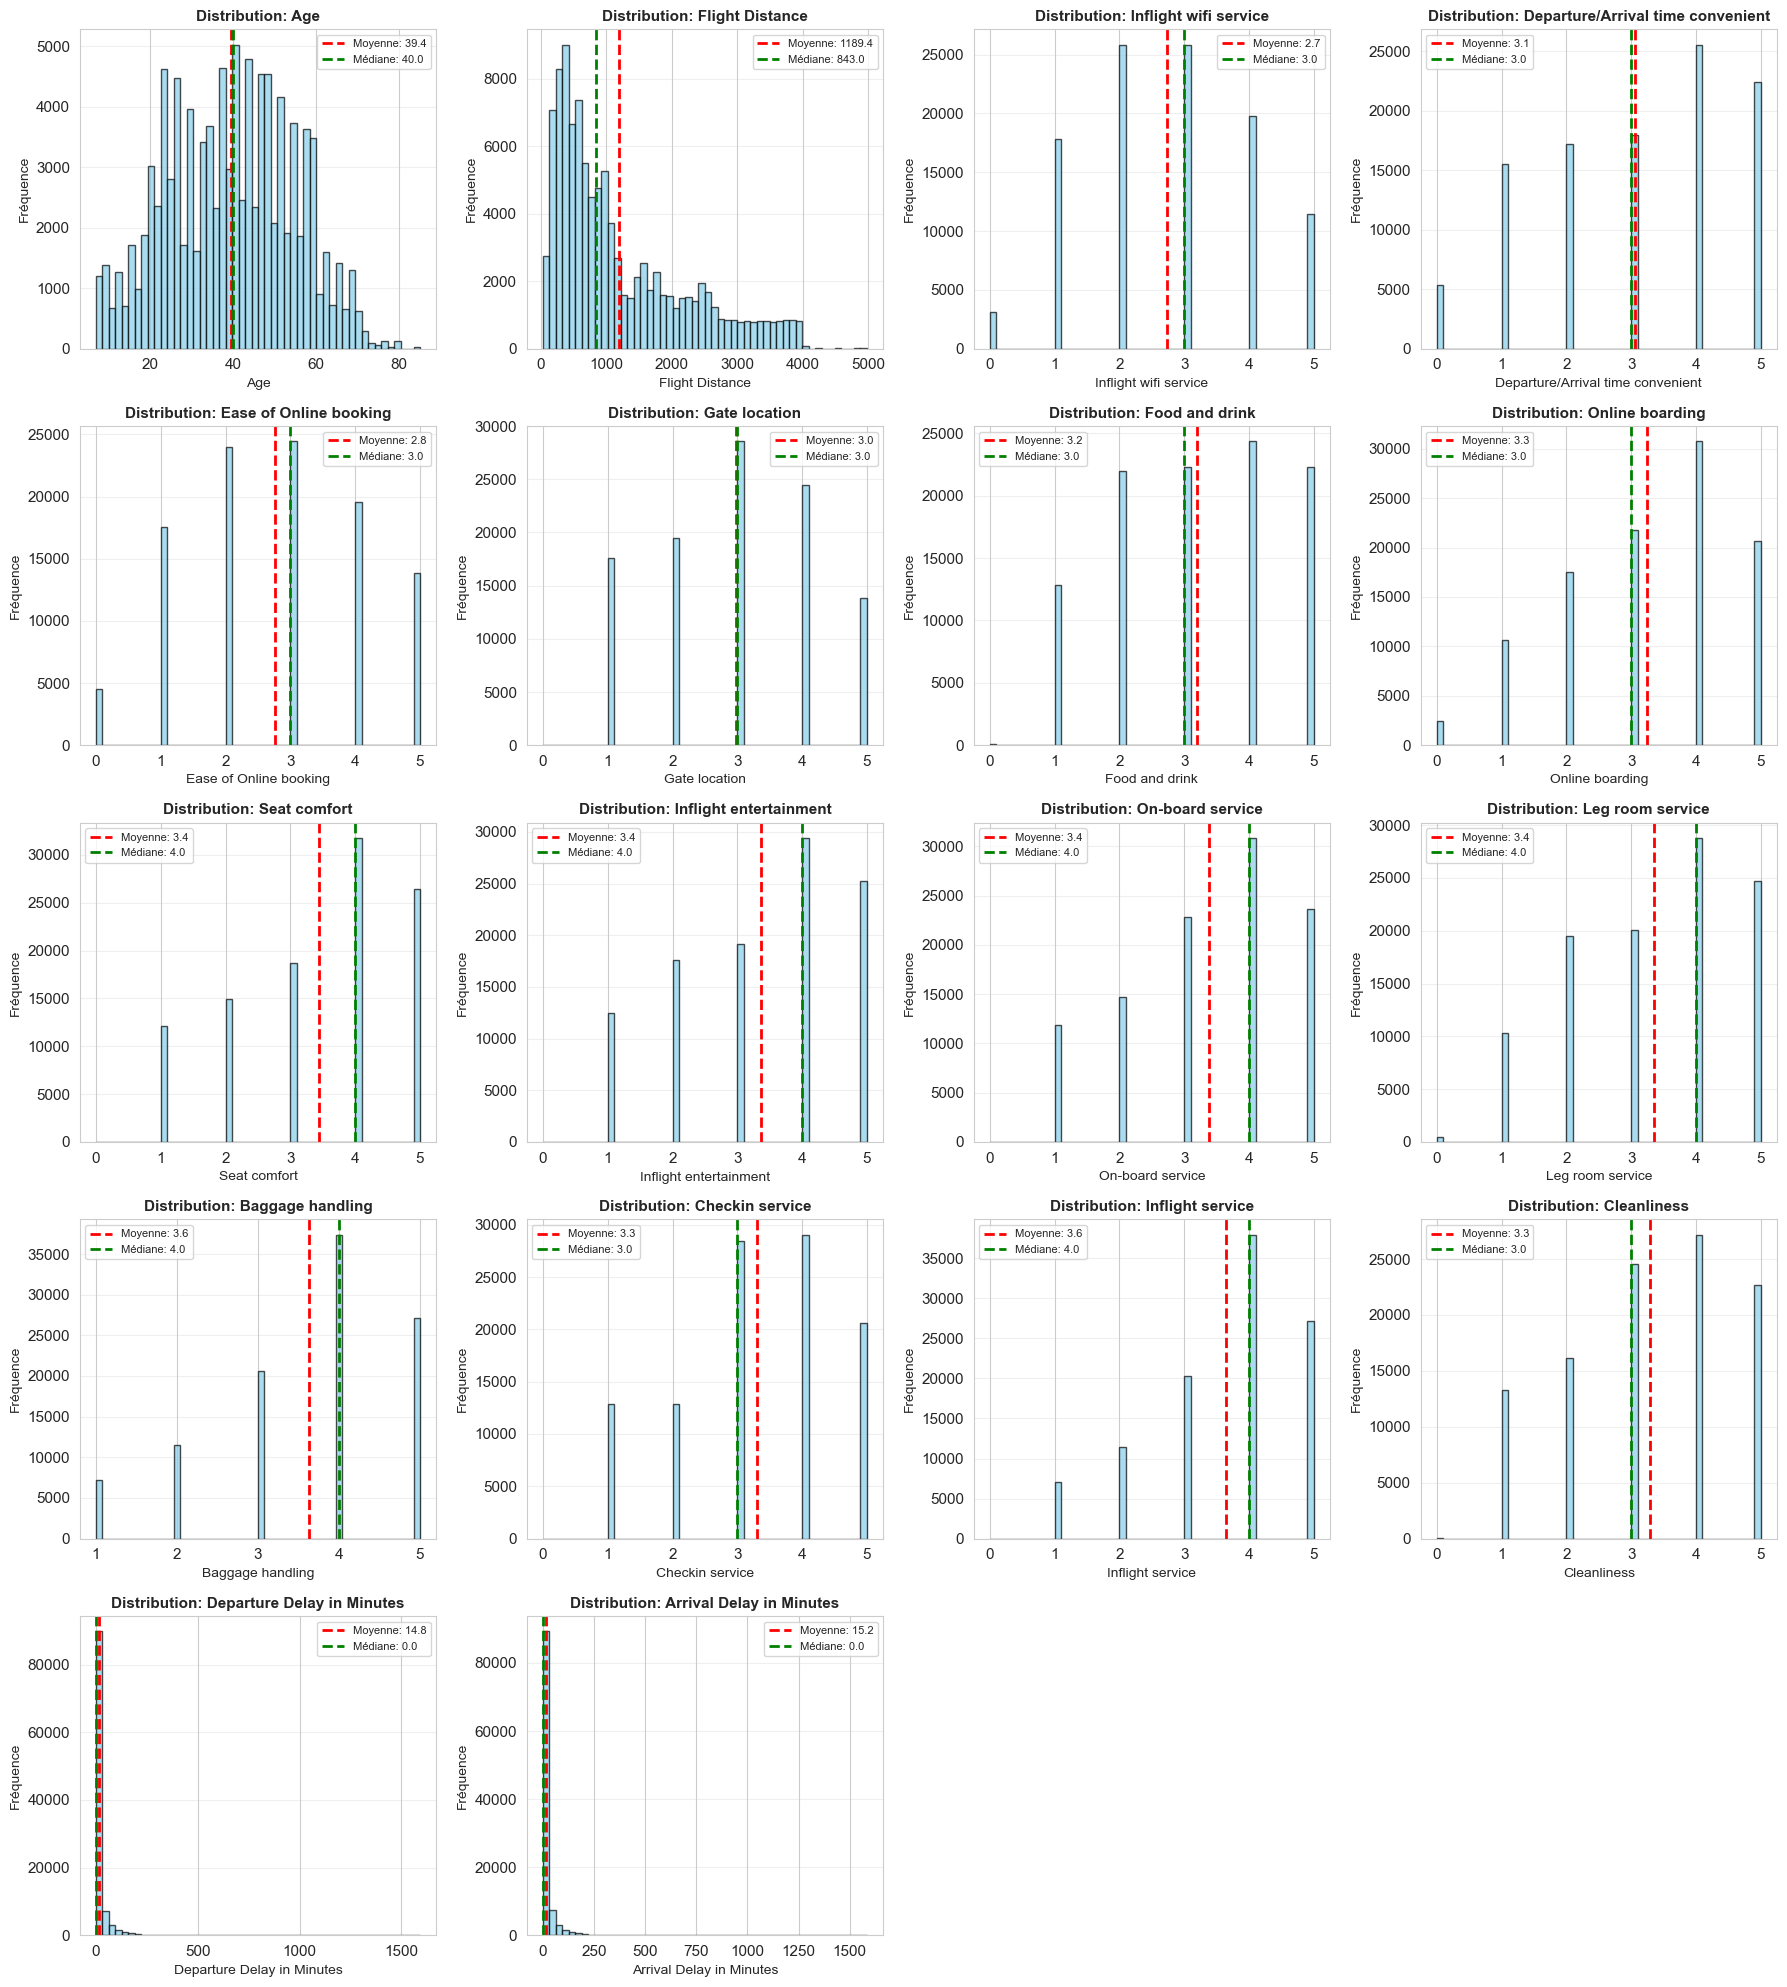


💾 Graphique sauvegardé: airline_numerical_distributions.png

📊 SECTION 6: DISTRIBUTION DES VARIABLES CATÉGORIELLES


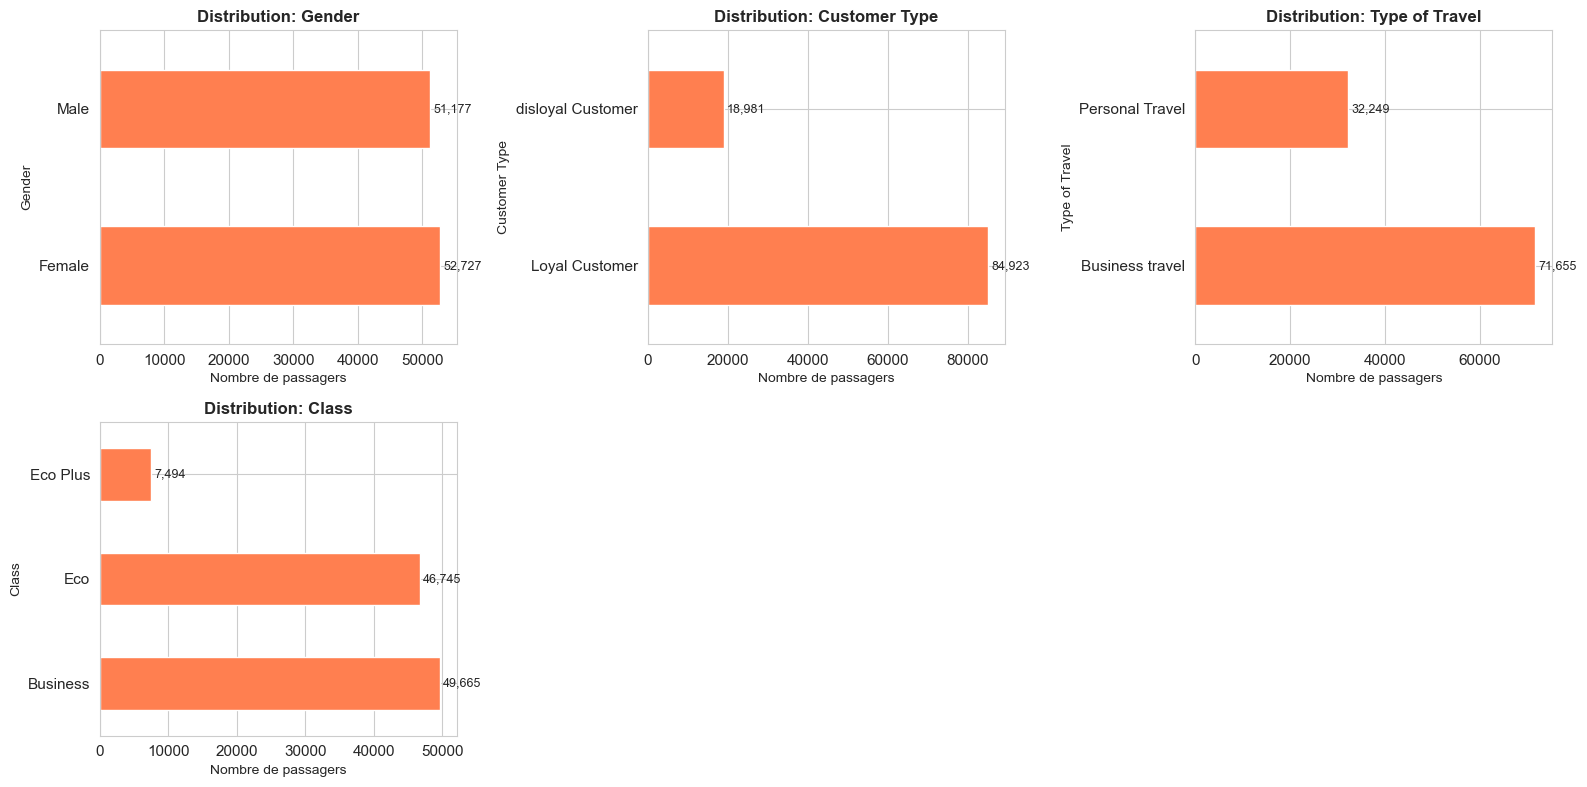


💾 Graphique sauvegardé: airline_categorical_distributions.png

🔗 SECTION 7: ANALYSE DES CORRÉLATIONS

--------------------------------------------------------------------------------
🎯 TOP CORRÉLATIONS AVEC LA CIBLE (satisfaction)
--------------------------------------------------------------------------------

📈 Corrélations POSITIVES:
   Online boarding                     :  0.504 ⭐⭐
   Inflight entertainment              :  0.398 ⭐
   Seat comfort                        :  0.349 ⭐
   On-board service                    :  0.322 ⭐
   Leg room service                    :  0.313 ⭐
   Cleanliness                         :  0.305 ⭐
   Flight Distance                     :  0.299 ⭐
   Inflight wifi service               :  0.284 ⭐
   Baggage handling                    :  0.248 ⭐
   Inflight service                    :  0.245 ⭐

📉 Corrélations NÉGATIVES:
   Departure Delay in Minutes          : -0.050 
   Departure/Arrival time convenient   : -0.052 
   Arrival Delay in Minutes       

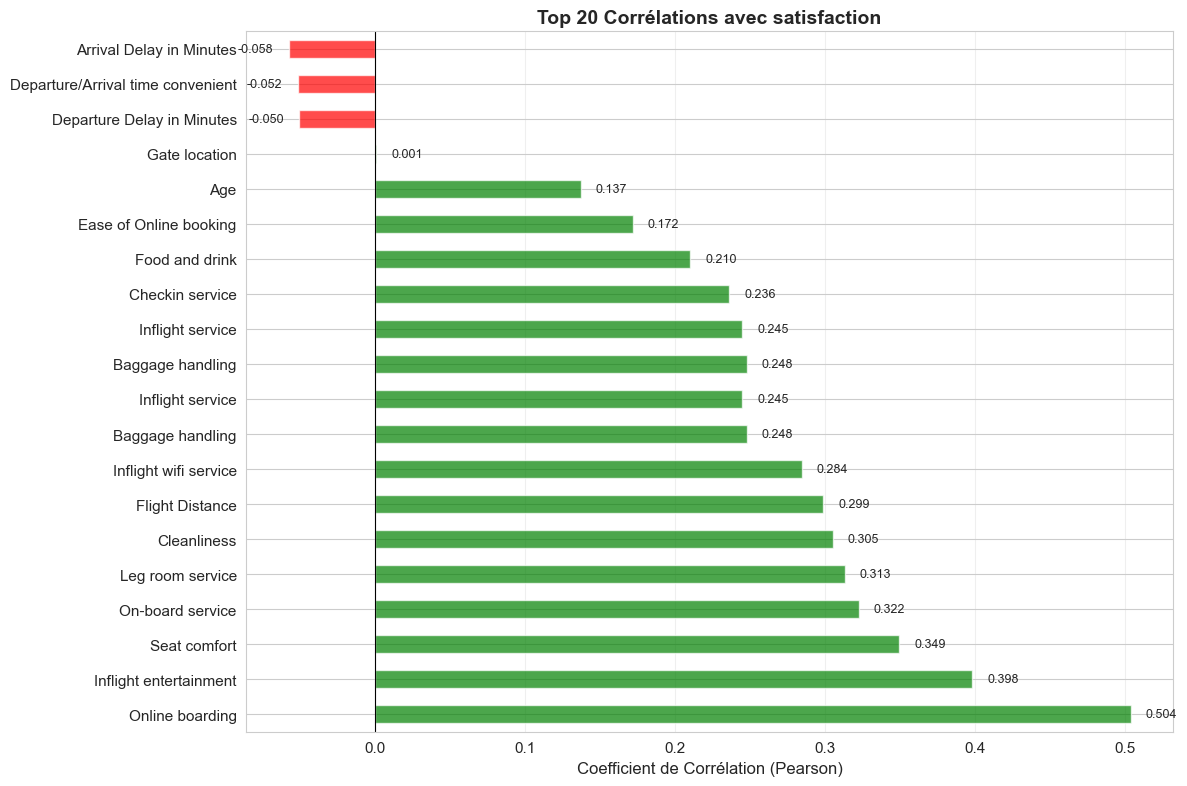


💾 Graphique sauvegardé: airline_target_correlations.png

--------------------------------------------------------------------------------
⚠️ DÉTECTION DE MULTICOLINÉARITÉ
--------------------------------------------------------------------------------

🔸 1 paires de variables fortement corrélées (|r| > 0.8):
   - Departure Delay in Minutes ↔ Arrival Delay in Minutes: 0.965

📊 SECTION 8: RELATION VARIABLES vs CIBLE

--------------------------------------------------------------------------------
📈 TESTS STATISTIQUES: Variables Numériques vs Cible
--------------------------------------------------------------------------------

🔬 T-tests (comparaison des moyennes):
Variable                            Moyenne Groupe 1   Moyenne Groupe 2   p-value      Significatif?
----------------------------------------------------------------------------------------------------
Age                                             37.57             41.75      0.0000 ✅ OUI
Flight Distance                    

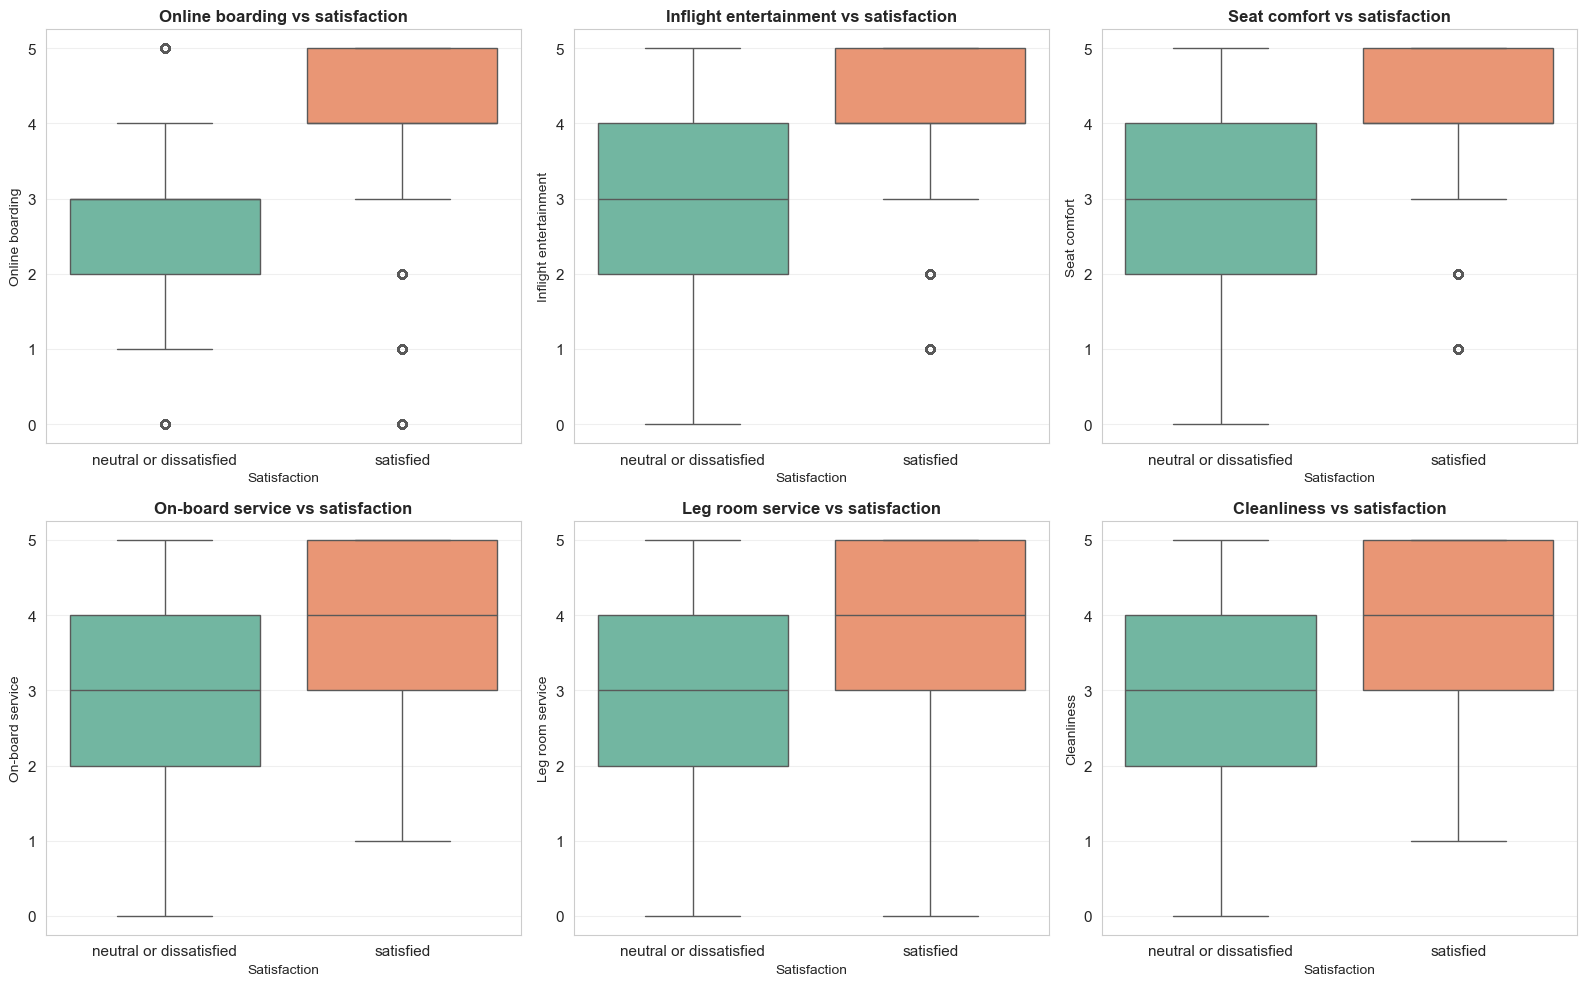


💾 Graphique sauvegardé: airline_boxplots_top_vars.png

--------------------------------------------------------------------------------
📝 TESTS CHI-CARRÉ: Variables Catégorielles vs Cible
--------------------------------------------------------------------------------

Variable                       Chi² Statistic     p-value      Cramér V     Significatif?
------------------------------------------------------------------------------------------
Gender                                     15.44      0.0001       0.012 ✅ OUI
Customer Type                            3657.28      0.0000       0.188 ✅ OUI
Type of Travel                          20945.23      0.0000       0.449 ✅ OUI
Class                                   26471.86      0.0000       0.505 ✅ OUI

💡 SECTION 9: INSIGHTS ET RECOMMANDATIONS

🔍 RÉSUMÉ DE L'ANALYSE:
--------------------------------------------------------------------------------

📊 DATASET:
   - Taille: 103,904 passagers × 25 variables
   - Variables numériques: 

In [4]:
# -*- coding: utf-8 -*-
"""Airline_Passenger_Satisfaction_EDA.ipynb

Analyse Exploratoire Complète - Satisfaction Passagers Aériens
Dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
"""



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Configuration visualisation
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

print("="*80)
print("✈️ ANALYSE EXPLORATOIRE - SATISFACTION PASSAGERS AÉRIENS")
print("="*80)

# ============================================================================
# 📁 SECTION 1: CHARGEMENT ET APERÇU GÉNÉRAL
# ============================================================================

print("\n" + "="*80)
print("📁 SECTION 1: CHARGEMENT ET APERÇU GÉNÉRAL")
print("="*80)

# Charger les données
df = pd.read_csv('train.csv')

print(f"\n✅ Dataset chargé avec succès!")
print(f"📊 Dimensions: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")

# Aperçu des données
print("\n" + "-"*80)
print("📋 APERÇU DES PREMIÈRES LIGNES")
print("-"*80)
print(df.head(10).to_string())

# Informations sur les colonnes
print("\n" + "-"*80)
print("📋 INFORMATIONS SUR LES COLONNES")
print("-"*80)
print(df.info())

# Types de données
print("\n" + "-"*80)
print("📊 TYPES DE DONNÉES")
print("-"*80)
type_counts = df.dtypes.value_counts()
print(type_counts)

print(f"\n   Variables numériques: {(df.dtypes != 'object').sum()}")
print(f"   Variables catégorielles: {(df.dtypes == 'object').sum()}")

# ============================================================================
# 🎯 SECTION 2: ANALYSE DE LA VARIABLE CIBLE
# ============================================================================

print("\n" + "="*80)
print("🎯 SECTION 2: ANALYSE DE LA VARIABLE CIBLE")
print("="*80)

# Identifier la variable cible
target_col = 'satisfaction'
if target_col not in df.columns:
    # Chercher des variantes
    possible_targets = [col for col in df.columns if 'satisf' in col.lower()]
    if possible_targets:
        target_col = possible_targets[0]
    print(f"⚠️ Colonne cible trouvée: '{target_col}'")

print(f"\n📊 Variable cible: '{target_col}'")

# Distribution de la cible
target_counts = df[target_col].value_counts()
target_pct = df[target_col].value_counts(normalize=True) * 100

print(f"\n📈 DISTRIBUTION DE LA CIBLE:")
print("-"*80)
for value, count in target_counts.items():
    pct = target_pct[value]
    print(f"   {value:25} : {count:>7,} ({pct:>5.2f}%)")

# Ratio de déséquilibre
if len(target_counts) == 2:
    minority_class = target_counts.min()
    majority_class = target_counts.max()
    imbalance_ratio = minority_class / majority_class
    print(f"\n⚖️ Ratio de déséquilibre: {imbalance_ratio:.4f} ({imbalance_ratio*100:.2f}%)")

    if imbalance_ratio > 0.4:
        print("   ✅ Dataset relativement ÉQUILIBRÉ (bon pour la modélisation)")
    elif imbalance_ratio > 0.2:
        print("   ⚠️ Déséquilibre MODÉRÉ (utilisable avec techniques appropriées)")
    else:
        print("   ❌ TRÈS DÉSÉQUILIBRÉ (nécessite SMOTE ou class_weight)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
target_counts.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Distribution de la Satisfaction', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Satisfaction', fontsize=12)
axes[0].set_ylabel('Nombre de Passagers', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Ajouter les valeurs sur les barres
for i, (idx, val) in enumerate(target_counts.items()):
    axes[0].text(i, val + 1000, f'{val:,}\n({target_pct[idx]:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#FF6B6B', '#4ECDC4']
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
           startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proportion de Satisfaction', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('graphiques/EDA/airline_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Graphique sauvegardé: airline_target_distribution.png")

# ============================================================================
# 🔍 SECTION 3: ANALYSE DES VALEURS MANQUANTES
# ============================================================================

print("\n" + "="*80)
print("🔍 SECTION 3: ANALYSE DES VALEURS MANQUANTES")
print("="*80)

# Compter les valeurs manquantes
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing_counts.index,
    'Valeurs Manquantes': missing_counts.values,
    'Pourcentage': missing_pct.values
})
missing_df = missing_df[missing_df['Valeurs Manquantes'] > 0].sort_values('Valeurs Manquantes', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠️ {len(missing_df)} colonnes avec valeurs manquantes:")
    print("-"*80)
    print(missing_df.to_string(index=False))

    # Visualisation
    if len(missing_df) <= 20:
        fig, ax = plt.subplots(figsize=(12, 6))
        missing_df.plot(x='Colonne', y='Pourcentage', kind='barh', ax=ax, color='coral')
        ax.set_title('Pourcentage de Valeurs Manquantes par Colonne', fontsize=14, fontweight='bold')
        ax.set_xlabel('Pourcentage (%)', fontsize=12)
        ax.set_ylabel('Colonne', fontsize=12)

        for i, (idx, row) in enumerate(missing_df.iterrows()):
            ax.text(row['Pourcentage'] + 0.5, i, f"{row['Pourcentage']:.2f}%",
                   va='center', fontsize=10)

        plt.tight_layout()
        plt.savefig('graphiques/EDA/airline_missing_values.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("\n💾 Graphique sauvegardé: airline_missing_values.png")
else:
    print("\n✅ Aucune valeur manquante détectée!")

# Valeurs totales manquantes
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
print(f"\n📊 Total de valeurs manquantes: {total_missing:,} / {total_cells:,} ({(total_missing/total_cells)*100:.2f}%)")

# ============================================================================
# 📊 SECTION 4: STATISTIQUES DESCRIPTIVES
# ============================================================================

print("\n" + "="*80)
print("📊 SECTION 4: STATISTIQUES DESCRIPTIVES")
print("="*80)

# Séparer numériques et catégorielles
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Retirer la cible des catégorielles si presente
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"\n📈 Variables numériques: {len(numerical_cols)}")
print(f"📝 Variables catégorielles: {len(categorical_cols)}")

# --- 4.1 Statistiques numériques ---
print("\n" + "-"*80)
print("📈 STATISTIQUES DES VARIABLES NUMÉRIQUES")
print("-"*80)

desc_stats = df[numerical_cols].describe().T
desc_stats['missing'] = df[numerical_cols].isnull().sum()
desc_stats['missing_pct'] = (desc_stats['missing'] / len(df)) * 100
desc_stats['skewness'] = df[numerical_cols].skew()
desc_stats['kurtosis'] = df[numerical_cols].kurtosis()

print(desc_stats.to_string())

# Identifier variables suspectes
print("\n⚠️ DÉTECTION D'ANOMALIES:")
print("-"*80)

# Skewness extrême
high_skew = desc_stats[abs(desc_stats['skewness']) > 2]
if len(high_skew) > 0:
    print(f"\n🔸 Variables avec forte asymétrie (|skew| > 2):")
    for col in high_skew.index:
        print(f"   - {col}: skew = {high_skew.loc[col, 'skewness']:.2f}")

# Outliers potentiels (via IQR)
print(f"\n🔸 Variables avec valeurs extrêmes potentielles:")
for col in numerical_cols[:5]:  # Limiter l'affichage
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if len(outliers) > 0:
        print(f"   - {col}: {len(outliers)} valeurs ({len(outliers)/len(df)*100:.2f}%) hors intervalle [{lower_bound:.2f}, {upper_bound:.2f}]")

# --- 4.2 Statistiques catégorielles ---
print("\n" + "-"*80)
print("📝 STATISTIQUES DES VARIABLES CATÉGORIELLES")
print("-"*80)

for col in categorical_cols:
    n_unique = df[col].nunique()
    most_common = df[col].value_counts().head(3)

    print(f"\n🔹 {col}")
    print(f"   Valeurs uniques: {n_unique}")
    print(f"   Top 3 valeurs:")
    for val, count in most_common.items():
        print(f"      - {val}: {count:,} ({count/len(df)*100:.1f}%)")

# ============================================================================
# 📊 SECTION 5: DISTRIBUTION DES VARIABLES NUMÉRIQUES
# ============================================================================

print("\n" + "="*80)
print("📊 SECTION 5: DISTRIBUTION DES VARIABLES NUMÉRIQUES")
print("="*80)

# Remove 'id' from numerical columns as it's not relevant for distribution plots
if 'id' in numerical_cols:
    numerical_cols.remove('id')

# Histogrammes
n_cols_plot = len(numerical_cols)
n_rows = (n_cols_plot + 3) // 4
n_cols_grid = min(4, n_cols_plot)

fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_cols_plot > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution: {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Fréquence', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

        # Ajouter statistiques
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.1f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.1f}')
        axes[idx].legend(fontsize=8)

# Supprimer axes vides
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('graphiques/EDA/airline_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Graphique sauvegardé: airline_numerical_distributions.png")

# ============================================================================
# 📊 SECTION 6: DISTRIBUTION DES VARIABLES CATÉGORIELLES
# ============================================================================

print("\n" + "="*80)
print("📊 SECTION 6: DISTRIBUTION DES VARIABLES CATÉGORIELLES")
print("="*80)

# Barplots
n_cat = len(categorical_cols)
if n_cat > 0:
    n_rows_cat = (n_cat + 2) // 3
    n_cols_cat = min(3, n_cat)

    fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(16, n_rows_cat * 4))
    axes = axes.flatten() if n_cat > 1 else [axes]

    for idx, col in enumerate(categorical_cols):
        if idx < len(axes):
            value_counts = df[col].value_counts().head(10)
            value_counts.plot(kind='barh', ax=axes[idx], color='coral')
            axes[idx].set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Nombre de passagers', fontsize=10)
            axes[idx].set_ylabel(col, fontsize=10)

            # Ajouter valeurs
            for i, v in enumerate(value_counts.values):
                axes[idx].text(v + max(value_counts) * 0.01, i, f'{v:,}',
                              va='center', fontsize=9)

    # Supprimer axes vides
    for idx in range(n_cat, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.savefig('graphiques/EDA/airline_categorical_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n💾 Graphique sauvegardé: airline_categorical_distributions.png")

# ============================================================================
# 🔗 SECTION 7: CORRÉLATIONS
# ============================================================================

print("\n" + "="*80)
print("🔗 SECTION 7: ANALYSE DES CORRÉLATIONS")
print("="*80)

# Créer target numérique si nécessaire
if df[target_col].dtype == 'object':
    df['target_numeric'] = df[target_col].map({
        'satisfied': 1,
        'neutral or dissatisfied': 0
    })
    if df['target_numeric'].isnull().any():
        # Essayer autres mappings
        unique_vals = df[target_col].unique()
        if len(unique_vals) == 2:
            df['target_numeric'] = (df[target_col] == unique_vals[0]).astype(int)

    target_numeric_col = 'target_numeric'
else:
    target_numeric_col = target_col

# Calcul de la matrice de corrélation (avec la cible numérique)
numerical_with_target = numerical_cols + [target_numeric_col] # Use the modified numerical_cols
if 'id' in numerical_with_target: # Ensure 'id' is removed if it was present
    numerical_with_target.remove('id')

corr_matrix = df[numerical_with_target].corr()

# Top corrélations avec la cible
print("\n" + "-"*80)
print(f"🎯 TOP CORRÉLATIONS AVEC LA CIBLE ({target_col})")
print("-"*80)

target_corr = corr_matrix[target_numeric_col].drop(target_numeric_col).sort_values(ascending=False)

print("\n📈 Corrélations POSITIVES:")
positive_corr = target_corr[target_corr > 0].head(10)
for var, corr_val in positive_corr.items():
    print(f"   {var:35} : {corr_val:>6.3f} {'⭐'*int(abs(corr_val)*5)}")

print("\n📉 Corrélations NÉGATIVES:")
negative_corr = target_corr[target_corr < 0].tail(10)
for var, corr_val in negative_corr.items():
    print(f"   {var:35} : {corr_val:>6.3f} {'⭐'*int(abs(corr_val)*5)}")

# Visualisation barplot
fig, ax = plt.subplots(figsize=(12, 8))
target_corr_top20 = pd.concat([target_corr.head(10), target_corr.tail(10)])
colors = ['green' if x > 0 else 'red' for x in target_corr_top20.values]
target_corr_top20.plot(kind='barh', ax=ax, color=colors, alpha=0.7)
ax.set_title(f'Top 20 Corrélations avec {target_col}', fontsize=14, fontweight='bold')
ax.set_xlabel('Coefficient de Corrélation (Pearson)', fontsize=12)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(target_corr_top20.values):
    ax.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}',
           va='center', ha='left' if v > 0 else 'right', fontsize=9)

plt.tight_layout()
plt.savefig('graphiques/EDA/airline_target_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Graphique sauvegardé: airline_target_correlations.png")

# Multicolinéarité
print("\n" + "-"*80)
print("⚠️ DÉTECTION DE MULTICOLINÉARITÉ")
print("-"*80)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print(f"\n🔸 {len(high_corr_pairs)} paires de variables fortement corrélées (|r| > 0.8):")
    for var1, var2, corr_val in high_corr_pairs[:10]:
        print(f"   - {var1} ↔ {var2}: {corr_val:.3f}")
    if len(high_corr_pairs) > 10:
        print(f"   ... et {len(high_corr_pairs) - 10} autres paires")
else:
    print("\n✅ Aucune multicolinéarité forte détectée")

# ============================================================================
# 📊 SECTION 8: RELATION VARIABLES vs CIBLE
# ============================================================================

print("\n" + "="*80)
print("📊 SECTION 8: RELATION VARIABLES vs CIBLE")
print("="*80)

# --- 8.1 Variables numériques vs cible ---
print("\n" + "-"*80)
print("📈 TESTS STATISTIQUES: Variables Numériques vs Cible")
print("-"*80)

# T-test pour chaque variable numérique
print("\n🔬 T-tests (comparaison des moyennes):")
print(f"{'Variable':<35} {'Moyenne Groupe 1':<18} {'Moyenne Groupe 2':<18} {'p-value':<12} {'Significatif?'}")
print("-"*100)

target_groups = df[target_col].unique()
group1_vals = df[df[target_col] == target_groups[0]]
group2_vals = df[df[target_col] == target_groups[1]]

significant_vars = []

for col in numerical_cols[:15]:  # Limiter pour affichage
    g1 = group1_vals[col].dropna()
    g2 = group2_vals[col].dropna()

    if len(g1) > 0 and len(g2) > 0:
        t_stat, p_val = ttest_ind(g1, g2)
        significant = "✅ OUI" if p_val < 0.05 else "❌ Non"

        if p_val < 0.05:
            significant_vars.append(col)

        print(f"{col:<35} {g1.mean():>17.2f} {g2.mean():>17.2f} {p_val:>11.4f} {significant}")

print(f"\n📊 Résumé: {len(significant_vars)} variables numériques significatives (p < 0.05)")

# Boxplots des variables les plus corrélées
top_vars_to_plot = target_corr.abs().head(6).index.tolist()

if len(top_vars_to_plot) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()

    for idx, var in enumerate(top_vars_to_plot):
        if var in df.columns:
            sns.boxplot(x=target_col, y=var, data=df, ax=axes[idx], palette='Set2')
            axes[idx].set_title(f'{var} vs {target_col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Satisfaction', fontsize=10)
            axes[idx].set_ylabel(var, fontsize=10)
            axes[idx].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('graphiques/EDA/airline_boxplots_top_vars.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n💾 Graphique sauvegardé: airline_boxplots_top_vars.png")

# --- 8.2 Variables catégorielles vs cible ---
print("\n" + "-"*80)
print("📝 TESTS CHI-CARRÉ: Variables Catégorielles vs Cible")
print("-"*80)

print(f"\n{'Variable':<30} {'Chi² Statistic':<18} {'p-value':<12} {'Cramér V':<12} {'Significatif?'}")
print("-"*90)

for col in categorical_cols[:10]:  # Limiter
    contingency_table = pd.crosstab(df[col], df[target_col])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)

    # Cramér's V (mesure d'association)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape[0], contingency_table.shape[1]) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    significant = "✅ OUI" if p_val < 0.05 else "❌ Non"

    print(f"{col:<30} {chi2:>17.2f} {p_val:>11.4f} {cramers_v:>11.3f} {significant}")

# ============================================================================
# 📊 SECTION 9: INSIGHTS ET RECOMMANDATIONS
# ============================================================================

print("\n" + "="*80)
print("💡 SECTION 9: INSIGHTS ET RECOMMANDATIONS")
print("="*80)

print("\n🔍 RÉSUMÉ DE L'ANALYSE:")
print("-"*80)

print(f"""
📊 DATASET:
   - Taille: {df.shape[0]:,} passagers × {df.shape[1]} variables
   - Variables numériques: {len(numerical_cols)} # This will now be 1 less due to 'id' removal
   - Variables catégorielles: {len(categorical_cols)}
   - Valeurs manquantes: {(total_missing/total_cells)*100:.2f}%

🎯 VARIABLE CIBLE:
   - Nom: {target_col}
   - Classes: {', '.join([str(x) for x in target_groups])}
   - Déséquilibre: {"Équilibré ✅" if imbalance_ratio > 0.4 else "Modéré ⚠️" if imbalance_ratio > 0.2 else "Sévère ❌"}

🔗 CORRÉLATIONS:
   - Variables fortement corrélées avec cible: {len(target_corr[abs(target_corr) > 0.3])}
   - Top 3 prédicteurs:
""")

for i, (var, corr) in enumerate(target_corr.head(3).items(), 1):
    print(f"      {i}. {var}: {corr:.3f}")

print(f"""
⚠️ POINTS D'ATTENTION:
   - Variables avec forte asymétrie: {len(high_skew)}
   - Paires multicolinéaires (|r|>0.8): {len(high_corr_pairs)}
""")

print("\n✅ RECOMMANDATIONS POUR LE PREPROCESSING:")
print("-"*80)
print("""
1. 🔧 TRAITEMENT DES VALEURS MANQUANTES:
   - Si < 5%: Imputation par médiane (numériques) ou mode (catégorielles)
   - Si > 5%: Analyser pattern et créer flag "missing"

2. 🎯 GESTION DU DÉSÉQUILIBRE:
   - Utiliser class_weight dans les modèles
   - Si nécessaire: SMOTE ou sous-échantillonnage

3. 📊 FEATURE ENGINEERING:
   - Créer interactions entre top variables corrélées
   - Binning des variables continues si nécessaire
   - One-Hot Encoding ou Target Encoding pour catégorielles

4. 🔍 FEATURE SELECTION:
   - Retirer variables avec corrélation cible < 0.1
   - Gérer multicolinéarité (VIF > 10)
   - Utiliser SelectKBest ou RFE

5. 📈 NORMALISATION:
   - StandardScaler ou RobustScaler pour variables avec outliers
   - Surtout important pour régression logistique et SVM
""")

print("\n🎯 MODÈLES RECOMMANDÉS:")
print("-"*80)
print("""
Basés sur la structure des données:
   ✅ 1. XGBoost / LightGBM (gèrent bien les corrélations)
   ✅ 2. Random Forest (robuste aux outliers)
   ✅ 3. Logistic Regression (baseline interprétable)
   ✅ 4. Neural Network (si >50k samples)

Performances attendues:
   - F1-Score: 0.85-0.95
   - ROC-AUC: 0.90-0.96
   - Accuracy: 0.88-0.94
""")

print("\n" + "="*80)
print("✅ ANALYSE EXPLORATOIRE TERMINÉE")
print("="*80)

print("""
📁 FICHIERS GÉNÉRÉS:
   - airline_target_distribution.png
   - airline_missing_values.png (si applicable)
   - airline_numerical_distributions.png
   - airline_categorical_distributions.png
   """)